# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

    1.Data
    2.Variable Definition
    3. User_ID User ID
    4. Product_ID Product ID
    5. Gender Sex of User
    6. Age Age in bins
    7. Occupation Occupation (Masked)
    8. City_Category Category of the City (A,B,C)
    9.Stay_In_Current_City_Years Number of years stay in current city
    10.Marital_Status Marital Status
    11.Product_Category_1 Product Category (Masked)
    12.Product_Category_2 Product may belongs to other category also (Masked)
    13.Product_Category_3 Product may belongs to other category also (Masked)
    14.Purchase Purchase Amount (Target Variable)

#  Libary Importing the required libraries for EDA

In [217]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


from plotly.offline import iplot 
import plotly.tools as tls 
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()




import warnings

%matplotlib inline
warnings.filterwarnings("ignore")


# Loading the data into the data frame 


In [218]:
df_train = pd.read_csv("https://raw.githubusercontent.com/iNeuronai/EDACollection/master/black_friday/blackFriday_train.csv")

In [238]:
#import test data 
df_test = pd.read_csv("https://raw.githubusercontent.com/iNeuronai/EDACollection/master/black_friday/blackFriday_test.csv")

In [240]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [286]:
df = df_train.append(df_test)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  User_ID                     233599 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 77.7+ MB


In [288]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,2.335990e+05
mean,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394,1.726505e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000,1.001527e+06
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000,1.003070e+06
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000,1.004477e+06
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [289]:
df.drop(['User_ID'],axis=1,inplace=True)

In [290]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [291]:
#Handling Categorical feature Gender
# df['Gender']  pd.get_dummies(df['Gender'],drop_first=1)
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [293]:
df['Age'].unique()


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [294]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [295]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [296]:
#Handling city_cat
df_city = pd.get_dummies(df['City_Category'],drop_first=True)

In [297]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [298]:
df = pd.concat([df,df_city],axis=1)

In [299]:
df.drop(['City_Category'],axis=1,inplace=True)

In [300]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [301]:
#Missing Values 
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [285]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,NaN,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,NaN,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,NaN,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,NaN,7,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,NaN,3,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,NaN,3,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,NaN,3,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,NaN,5,1,4+,0,10,16.0,NaN,NaN,0,1


In [304]:
#Focus on replacei
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [306]:
df['Product_Category_2'].value_counts()   #Discreate variable 

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [313]:
#Replacing the missing values with mode 

df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [316]:
df['Product_Category_2'].mode()[0]

8.0

In [317]:
#Product category 3 replace missing values 
df['Product_Category_3'].unique()


array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [318]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [319]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [321]:
df['Product_Category_3'].isnull().sum()

0

In [323]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [330]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [339]:
#convert object to interger df
# df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'])

In [340]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [341]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

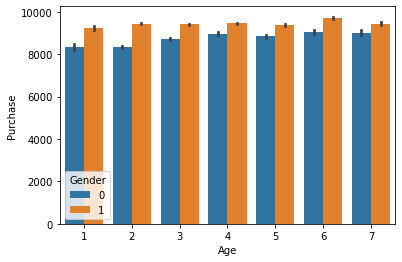

In [346]:
##Visualitation   A vs purchaged
sns.barplot('Age','Purchase',hue="Gender",data=df)

# Puchasing of men is high then women 


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

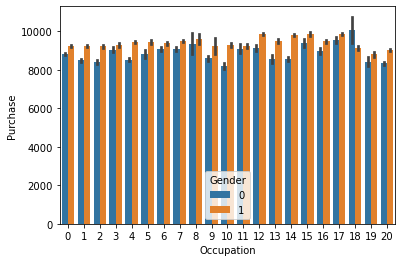

In [348]:
# Visualization of purchage with occpuation 

sns.barplot('Occupation','Purchase',hue="Gender",data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

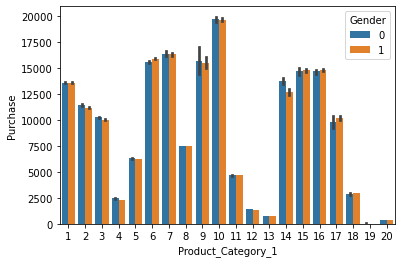

In [349]:
# Visualization of purchage with occpuation 

sns.barplot('Product_Category_1','Purchase',hue="Gender",data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

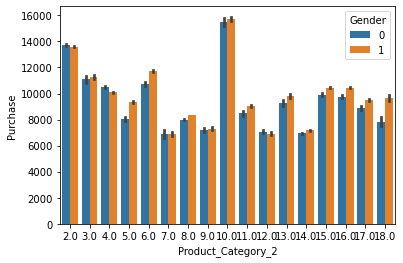

In [350]:
sns.barplot('Product_Category_2','Purchase',hue="Gender",data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

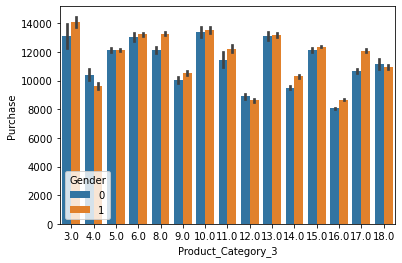

In [351]:
sns.barplot('Product_Category_3','Purchase',hue="Gender",data=df)

In [353]:
##Feature Scaling 
df_test = df[df['Purchase'].isnull()]

233599

In [354]:
df_train = df[~df['Purchase'].isnull()]

In [356]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [ ]:
from sklearn .preprocessing import StandardScaler
sc= StandardSclaer()
df_train()

# Understanding Data 

In [219]:
df_train.shape

(550068, 12)

In [220]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [221]:
df_train.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [222]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [223]:
# Statistical description of numerical variables¶

df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


As we can see average purchase amount is 9263.968713 and minimum and maximum are 12 and 23961

In [224]:
# Summary Statistics of Categorical Values

df_train.describe(include=['O']) #Generate descriptive statistics only for columns with object datatype


,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


# A. Data Preprocessing


In [225]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [226]:
# Checking the types of data
df_train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

<AxesSubplot:>

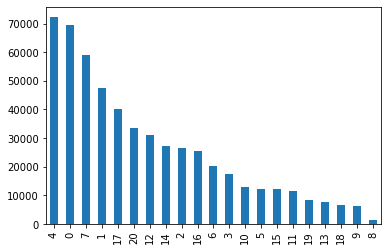

In [227]:
df_train['Occupation'].value_counts().plot(kind='bar')

<AxesSubplot:>

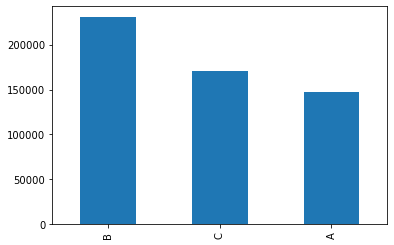

In [228]:
df_train['City_Category'].value_counts().plot(kind='bar')

<AxesSubplot:>

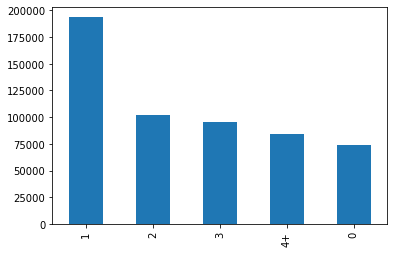

In [229]:
df_train['Stay_In_Current_City_Years'].value_counts().plot(kind='bar')

<AxesSubplot:>

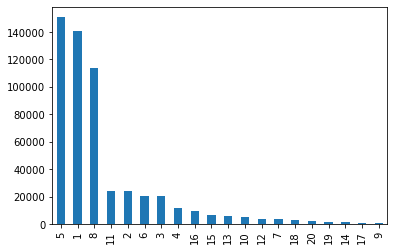

In [230]:
df_train['Product_Category_1'].value_counts().plot(kind='bar')

<AxesSubplot:>

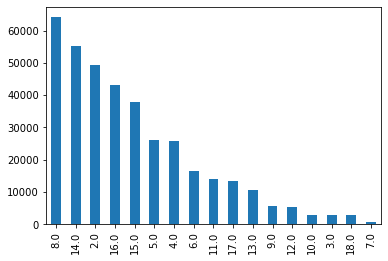

In [231]:
df_train['Product_Category_2'].value_counts().plot(kind='bar')

<AxesSubplot:>

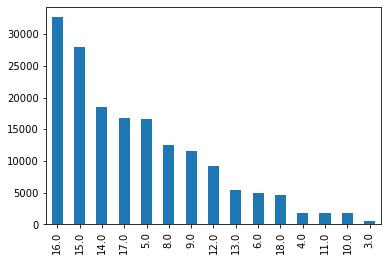

In [232]:
df_train['Product_Category_3'].value_counts().plot(kind='bar')

# B. Exploratory Data Analysis

In [233]:
# 1. Dropping unnessary Columns---- we don't need 'User_Id'
df_train.drop('User_ID',axis=1,inplace=True)

In [234]:
df_train.shape

(550068, 11)

In [235]:
#2. Changing dtypes to datetime
df_train.dtypes


Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

#### DATA VISUALIZATION - Numerical  FEATURES

In [236]:
df_train.drop(columns = ['Occupation','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Purchase
0,P00069042,F,0-17,A,2,8370
1,P00248942,F,0-17,A,2,15200
2,P00087842,F,0-17,A,2,1422
3,P00085442,F,0-17,A,2,1057
4,P00285442,M,55+,C,4+,7969
...,...,...,...,...,...,...
550063,P00372445,M,51-55,B,1,368
550064,P00375436,F,26-35,C,3,371
550065,P00375436,F,26-35,B,4+,137
550066,P00375436,F,55+,C,2,365


SyntaxError: invalid syntax (<ipython-input-237-40c5c93bca4b>, line 1)

In [174]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='Gender',hue='Purchase')

KeyboardInterrupt: 

<Figure size 720x720 with 0 Axes>

In [ ]:
# Univariate visualization
# for i,predictor in enumerate(df.drop(columns = ['Product_ID','Occupation','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3'])):
#     plt.figure(i,figsize=(10,10))
#     sns.countplot(data=df,x=predictor,hue='Purchase')


In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x = 'Age',hue="Purchase")

In [ ]:
sns.barplot(x='Product_Category_1',y='Purchase',data= df)

In [ ]:
# Bivariate visualization 

In [80]:
df[]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [81]:
df['Product_Category_1'].isnull().sum()

0

In [ ]:
# Multivariate visualization 

#### DATA VISUALIZATION  CATEGORICAL FEATURES


# Data Cleaning 

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
# Looking at the percentage of missing values per column¶
for i,column in enumerate(df.drop(columns=['Product_ID'],axis=1)):
    per_missing_value = 100 * df[column].isnull().sum() / len(df)
    if per_missing_value >0:
        print(f'% of missing null values of  {column} is {per_missing_value}')
        

        

In [ ]:
# Handeling Missing Values

In [ ]:
# Missing values for all numeric features in Bar chart Representation



In [ ]:
# Missing values for Categorical features in Bar chart Representation

## Data Trasformation 


In [ ]:
# Converting Categorical Values to Numerical Values
